c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale 

Best Configuration:
layers        (100, 50)
activation    tanh
solver        adam
F1-avg        0.747
F1-std        0.0764
Acc-avg       0.7841
Acc-std       0.0521


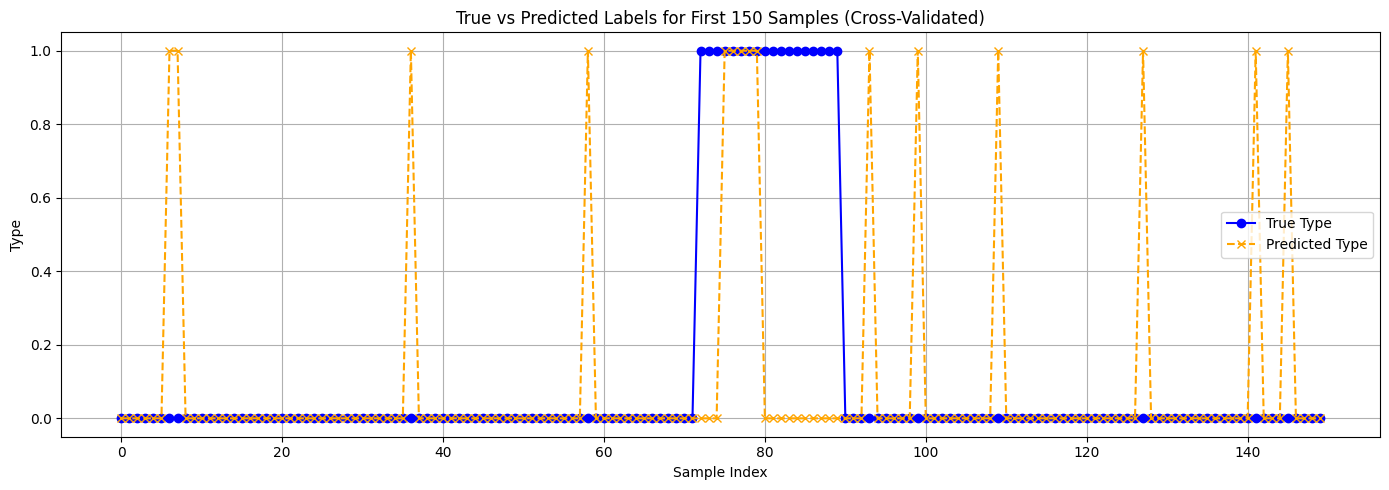

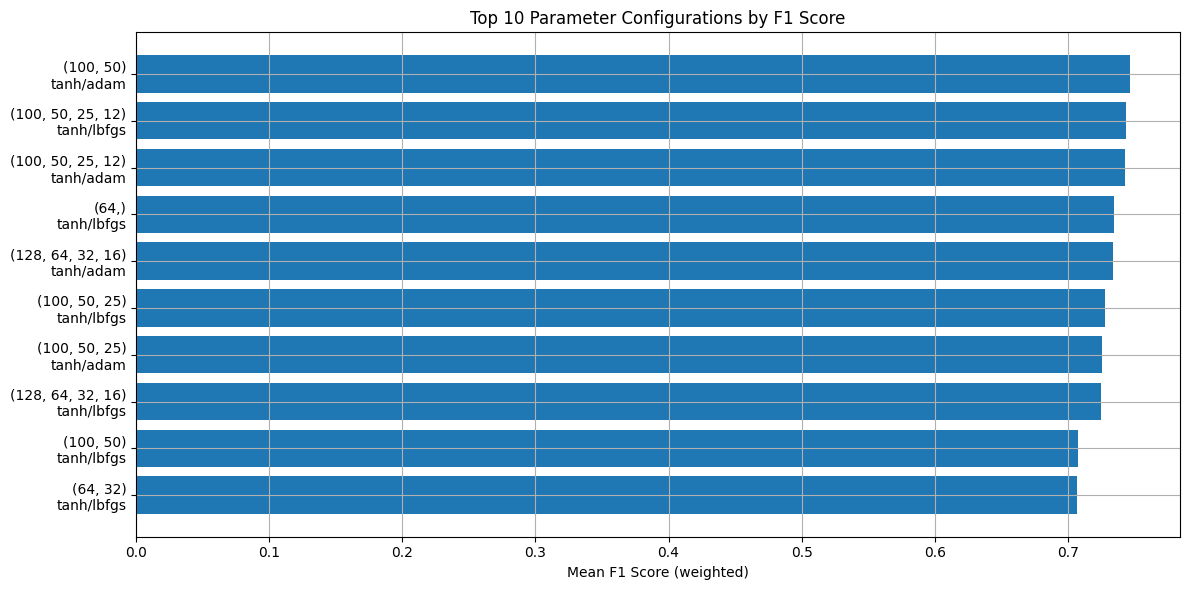

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score


data = pd.read_csv('data/processed/train.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32),(128, 64, 32, 16),(100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)


best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)


f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')


print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


cv_results = pd.DataFrame(grid_search.cv_results_)


cv_results["config"] = cv_results.apply(
    lambda row: f"{row['param_hidden_layer_sizes']}\n{row['param_activation']}/{row['param_solver']}", axis=1
)


top10 = cv_results.sort_values(by="mean_test_score", ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.barh(range(10), top10["mean_test_score"][::-1])  
plt.yticks(range(10), top10["config"][::-1])
plt.xlabel("Mean F1 Score (weighted)")
plt.title("Top 10 Parameter Configurations by F1 Score")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale 

Best Configuration:
layers        (100, 50, 25)
activation    tanh
solver        adam
F1-avg        0.7378
F1-std        0.0755
Acc-avg       0.7841
Acc-std       0.0495


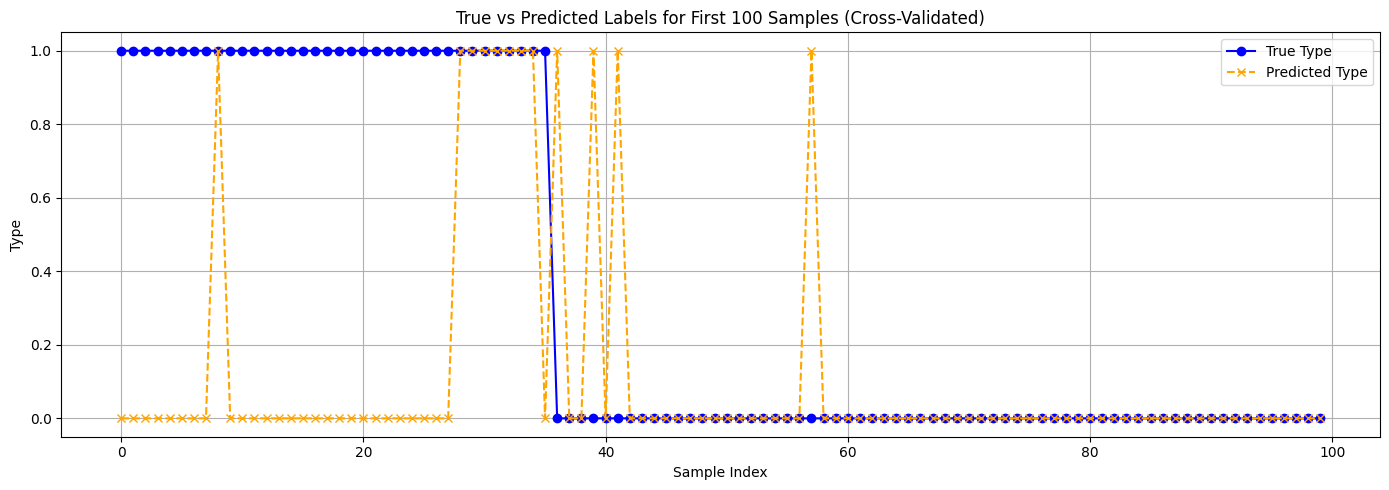

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score


data = pd.read_csv('data/processed/train_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32),(128, 64, 32, 16),(100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)


best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)


f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')


print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y.values[:100], 'bo-', label='True Type')  
plt.plot(y_pred_cv[:100], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 100 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

Best Configuration:
layers        (128, 64)
activation    relu
solver        lbfgs
F1-avg        0.9061
F1-std        0.0191
Acc-avg       0.9091
Acc-std       0.0161


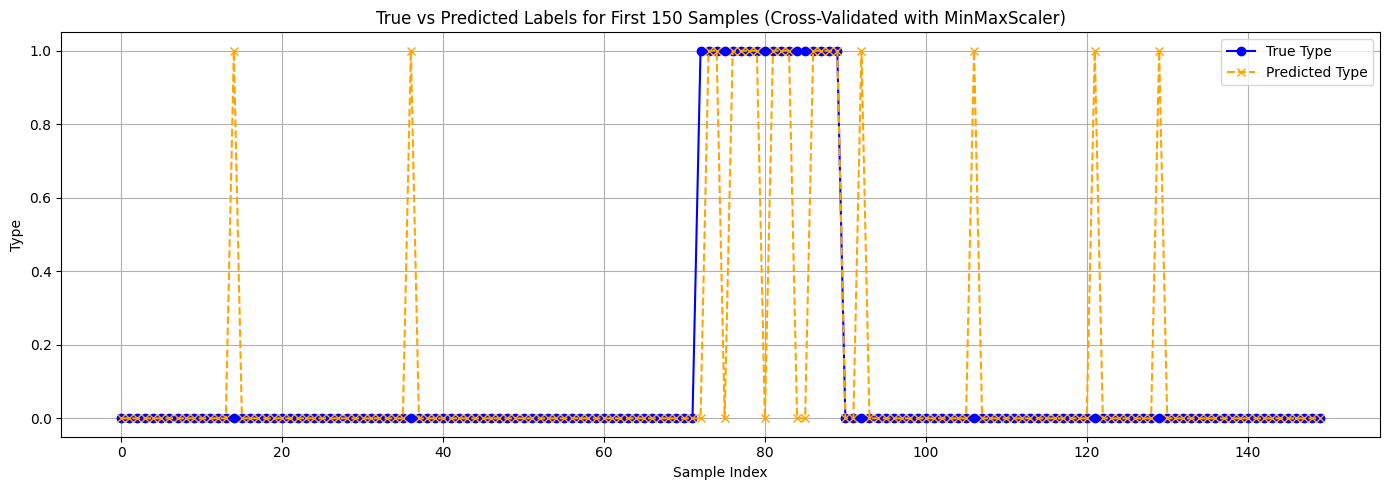

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import make_scorer, f1_score, accuracy_score


data = pd.read_csv('data/processed/train.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)


best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)


f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')


print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated with MinMaxScaler)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

Best Configuration:
layers        (64, 32)
activation    relu
solver        lbfgs
F1-avg        0.9148
F1-std        0.0204
Acc-avg       0.9148
Acc-std       0.0188


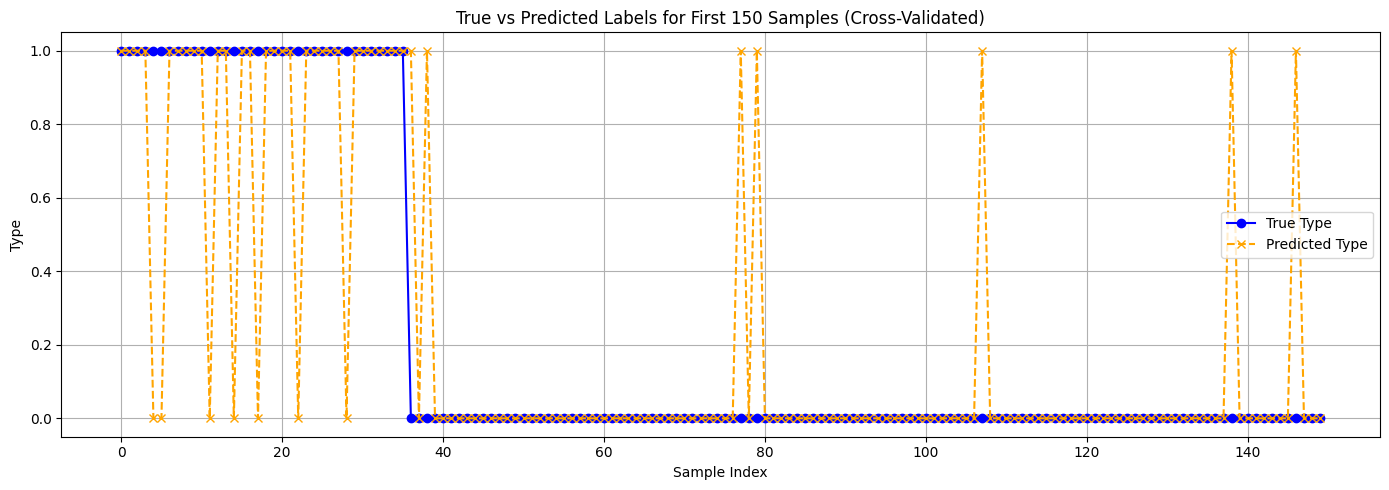

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score


data = pd.read_csv('data/processed/train_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)


best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)


f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')


print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

Best Configuration After SMOTE (evaluated on balanced data):
layers        (100,)
activation    relu
solver        lbfgs
F1-avg        0.9498
F1-std        0.026
Acc-avg       0.95
Acc-std       0.0258


C:\Users\HP\AppData\Local\Temp\ipykernel_2340\813318962.py:63: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\813318962.py:63: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\813318962.py:63: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roam

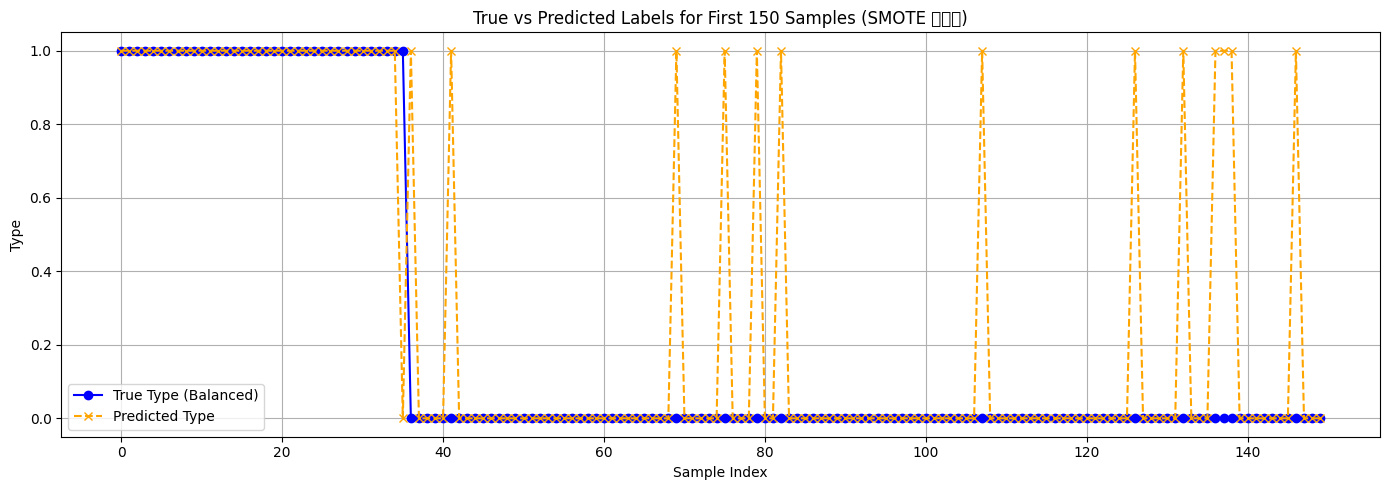

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE


data = pd.read_csv('data/processed/train_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


scaler_SMOTE = MinMaxScaler()
X_scaled_SMOTE = scaler_SMOTE.fit_transform(X)


smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled_SMOTE, y)


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)

）
best_model_SMOTE = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_SMOTE, X_bal, y_bal, cv=4)


f1_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring='accuracy')


print("Best Configuration After SMOTE (evaluated on balanced data):")
print(f"layers        {best_model_SMOTE.hidden_layer_sizes}")
print(f"activation    {best_model_SMOTE.activation}")
print(f"solver        {best_model_SMOTE.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y_bal[:150], 'bo-', label='True Type (Balanced)')  
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (SMOTE 全流程)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\neural_netwo

Best Configuration After ADASYN (evaluated on balanced data):
layers        (64,)
activation    relu
solver        lbfgs
F1-avg        0.9611
F1-std        0.0252
Acc-avg       0.9612
Acc-std       0.0251


C:\Users\HP\AppData\Local\Temp\ipykernel_2340\2873419716.py:63: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\2873419716.py:63: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\2873419716.py:63: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\R

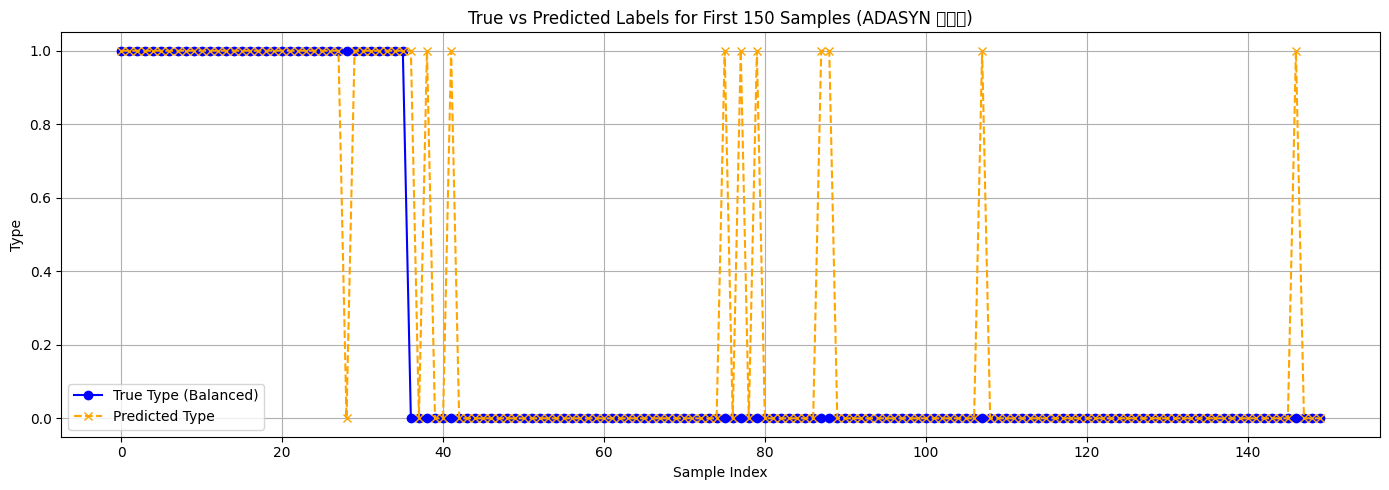

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import ADASYN  # ✅  ADASYN


data = pd.read_csv('data/processed/train_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]


scaler_ADASYN = MinMaxScaler()
X_scaled_ADASYN = scaler_ADASYN.fit_transform(X)


adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X_scaled_ADASYN, y)


param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}


model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)


best_model_ADASYN = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_ADASYN, X_bal, y_bal, cv=4)


f1_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring='accuracy')


print("Best Configuration After ADASYN (evaluated on balanced data):")
print(f"layers        {best_model_ADASYN.hidden_layer_sizes}")
print(f"activation    {best_model_ADASYN.activation}")
print(f"solver        {best_model_ADASYN.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y_bal[:150], 'bo-', label='True Type (Balanced)')  
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (ADASYN 全流程)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd


test_C = pd.read_csv("data/processed/test.csv")  
X_C = test_C.drop(columns=["Type"])
y_C = test_C["Type"]


X_C_scaled = scaler_ADASYN.transform(X_C)


y_C_pred = best_model_ADASYN.predict(X_C_scaled)


acc_C = accuracy_score(y_C, y_C_pred)
f1_C = f1_score(y_C, y_C_pred, average='weighted')

print("Контрольная выборка C - Проверка лучшей модели (ADASYN):")
print(f"Accuracy: {round(acc_C, 4)}")
print(f"F1 Score (weighted): {round(f1_C, 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y_C.values[:150], 'bo-', label='True Type (C выборка)')
plt.plot(y_C_pred[:150], 'x--', color='orange', label='Predicted Type (ADASYN)')
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels on Контрольная выборка C (ADASYN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined